In [1]:
# %matplotlib inline
import torch
from torch import nn
import numpy as np
from torch.utils import data
from io import StringIO
import random
from d2l import torch as d2l
from matplotlib import pyplot as plt
import glob
import os
import re

In [4]:
# import data
def moduli_read(d_dir, d_size):
    moduli = np.empty(shape = (0, 1))

    fmoduli_name = r'\results.txt'
    fmoduli_dir = d_dir + fmoduli_name
    moduli_read = np.genfromtxt (fmoduli_dir, dtype = str, delimiter = '\t')

    index_z = np.linspace(2, int(7*d_size)-5, num = d_size)
    index_y = np.linspace(4, int(7*d_size)-3, num = d_size)
    index_x = np.linspace(6, int(7*d_size)-1, num = d_size)
    moduli_z = np.char.split(moduli_read[index_z.astype(int)])
    moduli_y = np.char.split(moduli_read[index_y.astype(int)])
    moduli_x = np.char.split(moduli_read[index_x.astype(int)])

    for i in range(d_size):
        moduli_z[i] =  moduli_z[i][0]
        moduli_y[i] =  moduli_y[i][1]
        moduli_x[i] =  moduli_x[i][2]

    moduli_x = moduli_x.astype(float)  
    moduli_y = moduli_y.astype(float)  
    moduli_z = moduli_z.astype(float)  
    
    return moduli_x, moduli_y, moduli_z

In [5]:
fmoduli_dir_pg_s = (r'D:\Code\ANSYS\pg_s\p1n')
fmoduli_dir_pg_r = (r'D:\Code\ANSYS\pg_r\p1n')
fmoduli_dir_lg_s = (r'D:\Code\ANSYS\lg_s\p1n')
fmoduli_dir_lg_r = (r'D:\Code\ANSYS\lg_r\p1n')
fmoduli_dir_sg_s = (r'D:\Code\ANSYS\sg_s\p1n')
fmoduli_dir_sg_r = (r'D:\Code\ANSYS\sg_r\p1n')
d_size = 800
moduli_x_pg_s, moduli_y_pg_s, moduli_z_pg_s = moduli_read(fmoduli_dir_pg_s, d_size)
moduli_x_pg_r, moduli_y_pg_r, moduli_z_pg_r = moduli_read(fmoduli_dir_pg_r, d_size)
moduli_x_lg_s, moduli_y_lg_s, moduli_z_lg_s = moduli_read(fmoduli_dir_lg_s, d_size)
moduli_x_lg_r, moduli_y_lg_r, moduli_z_lg_r = moduli_read(fmoduli_dir_lg_r, d_size)
moduli_x_sg_s, moduli_y_sg_s, moduli_z_sg_s = moduli_read(fmoduli_dir_sg_s, d_size)
moduli_x_sg_r, moduli_y_sg_r, moduli_z_sg_r = moduli_read(fmoduli_dir_sg_r, d_size)


In [6]:
# # check
# print('', moduli_x_pg_s.shape,'\n',moduli_y_pg_s.shape,'\n',moduli_z_pg_s.shape,'\n')
# print('', moduli_x_pg_s.shape,'\n',moduli_x_pg_r.shape,'\n',
#       moduli_x_lg_s.shape,'\n',moduli_x_lg_r.shape,'\n',
#       moduli_x_sg_s.shape,'\n',moduli_x_sg_r.shape,'\n')
# print(moduli_x_sg_s[:20])

In [7]:
moduli_non, elems_fnl_non, moduli, elems_fnl = torch.load('./training_data/training_data.pt')

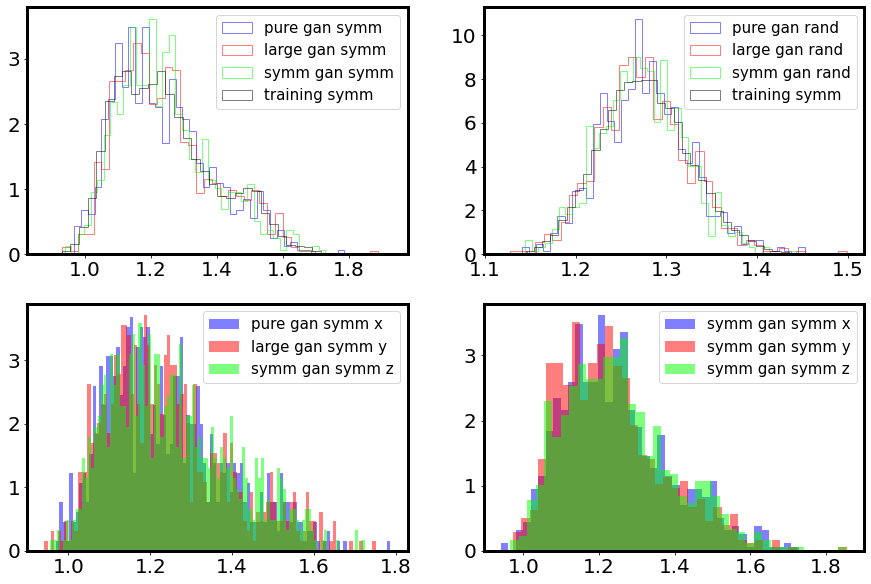

In [8]:
labels_s = ['pure gan symm','large gan symm','symm gan symm', 'training symm']
labels_r = ['pure gan rand','large gan rand','symm gan rand', 'training rand']
labels_p_s = ['pure gan symm x','large gan symm y','symm gan symm z']
labels_s_s = ['symm gan symm x','symm gan symm y','symm gan symm z']
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

plt_x_pg_s = ax0.hist(moduli_x_pg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = labels_s[0])
plt_x_lg_s = ax0.hist(moduli_x_lg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = labels_s[1])
plt_x_sg_s = ax0.hist(moduli_x_sg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [0,1,0,0.5], label = labels_s[2])
plt_x_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 40, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = labels_s[3])

ax0.legend(prop={'size': 15})

plt_x_pg_r = ax1.hist(moduli_x_pg_r.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = labels_r[0])
plt_x_lg_r = ax1.hist(moduli_x_lg_r.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = labels_r[1])
plt_x_sg_r = ax1.hist(moduli_x_sg_r.reshape(800,1), bins = 40, density = True, 
                      histtype='step', color = [0,1,0,0.5], label = labels_r[2])
plt_x_train_r = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 40, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = labels_s[3])
ax1.legend(prop={'size': 15})

plt_x_pg_s = ax2.hist(moduli_x_pg_s.reshape(800,1), bins = 100, density = True, 
                      histtype='bar', color = [0,0,1,0.5], label = labels_p_s[0])
plt_y_pg_s = ax2.hist(moduli_y_pg_s.reshape(800,1), bins = 100, density = True, 
                      histtype='bar', color = [1,0,0,0.5], label = labels_p_s[1])
plt_z_pg_s = ax2.hist(moduli_z_pg_s.reshape(800,1), bins = 100, density = True, 
                      histtype='bar', color = [0,1,0,0.5], label = labels_p_s[2])
ax2.legend(prop={'size': 15})

plt_x_sg_s = ax3.hist(moduli_x_sg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [0,0,1,0.5], label = labels_s_s[0])
plt_y_sg_s = ax3.hist(moduli_y_sg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [1,0,0,0.5], label = labels_s_s[1])
plt_z_sg_s = ax3.hist(moduli_z_sg_s.reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [0,1,0,0.5], label = labels_s_s[2])
ax3.legend(prop={'size': 15})

font_size = 20
# plt.legend([plt_x_pg_s, plt_x_lg_s], 
#            ['moduli_fem gen pg_s', 'moduli_fem gen lg_s'],
#            loc=(0.1,0.25), fontsize = 18, ncol = 2)
ax0.tick_params(labelsize=font_size)
ax1.tick_params(labelsize=font_size)
ax2.tick_params(labelsize=font_size)
ax3.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
plt.show()

train symm 1.2464564710583332 
 pure gan symm 1.2395635626750001 
 train random 1.2766957006916666 
 pure gan random 1.2767616093125 



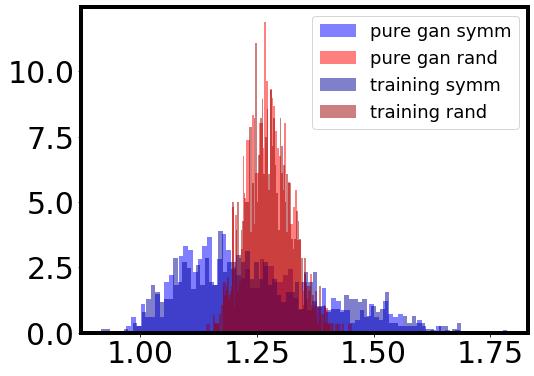

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
plt_x_pg_s = ax.hist(moduli_x_pg_s.reshape(800,1), bins = 80, density = True, 
                      histtype='bar', color = [0,0,1,0.5], label = labels_s[0])
plt_x_pg_r = ax.hist(moduli_x_pg_r.reshape(800,1), bins = 80, density = True, 
                      histtype='bar', color = [1,0,0,0.5], label = labels_r[0])
plt_x_train_s = ax.hist(moduli[:800][:,0].reshape(800,1), bins = 80, density = True, 
                      histtype='bar', color = [0,0,0.6,0.5], label = labels_s[3])
plt_x_train_r = ax.hist(moduli_non[:800][:,0].reshape(800,1), bins = 80, density = True, 
                      histtype='bar', color = [0.6,0,0,0.5], label = labels_r[3])
ax.legend(prop={'size': 18})
font_size = 30
ax.tick_params(labelsize=font_size)
ax.spines[['left','right','bottom','top']].set_linewidth(4)


In [16]:
print('','train symm', np.mean(moduli[:800]),'\n',
      'train random', np.mean(moduli_non[:800]),'\n',
      'pure gan symm', np.mean(moduli_x_pg_s),'\n',
      'pure gan random', np.mean(moduli_x_pg_r),'\n',
      'large gan symm', np.mean(moduli_x_lg_s),'\n',
      'large gan random', np.mean(moduli_x_lg_r),'\n',
      'symm gan symm', np.mean(moduli_x_sg_s),'\n',
      'symm gan random', np.mean(moduli_x_sg_r),'\n',)

 train symm 1.2464564710583332 
 train random 1.2766957006916666 
 pure gan symm 1.2395635626750001 
 pure gan random 1.2767616093125 
 large gan symm 1.2485575228499999 
 large gan random 1.275277929325 
 symm gan symm 1.246726718675 
 symm gan random 1.273078978225 



In [10]:
moduli_pg_s = np.hstack((moduli_x_pg_s.reshape(800,1), 
                           moduli_y_pg_s.reshape(800,1), 
                           moduli_z_pg_s.reshape(800,1)))
moduli_pg_r = np.hstack((moduli_x_pg_r.reshape(800,1), 
                           moduli_y_pg_r.reshape(800,1), 
                           moduli_z_pg_r.reshape(800,1)))
moduli_lg_s = np.hstack((moduli_x_lg_s.reshape(800,1), 
                           moduli_y_lg_s.reshape(800,1), 
                           moduli_z_lg_s.reshape(800,1)))
moduli_lg_r = np.hstack((moduli_x_lg_s.reshape(800,1), 
                           moduli_y_lg_s.reshape(800,1), 
                           moduli_z_lg_s.reshape(800,1)))
moduli_sg_s = np.hstack((moduli_x_sg_s.reshape(800,1), 
                           moduli_y_sg_s.reshape(800,1), 
                           moduli_z_sg_s.reshape(800,1)))
moduli_sg_r = np.hstack((moduli_x_sg_r.reshape(800,1), 
                           moduli_y_sg_r.reshape(800,1), 
                           moduli_z_sg_r.reshape(800,1)))

In [20]:
std_pg_s = np.std(moduli_pg_s, axis = 1)
std_pg_r = np.std(moduli_pg_r, axis = 1)
std_lg_s = np.std(moduli_lg_s, axis = 1)
std_lg_r = np.std(moduli_lg_r, axis = 1)
std_sg_s = np.std(moduli_sg_s, axis = 1)
std_sg_r = np.std(moduli_sg_r, axis = 1)
std_trn_s = np.std(moduli, axis = 1)
std_trn_r = np.std(moduli_non, axis = 1)

In [26]:
print('','train symm', np.mean(std_pg_s[:800]),'\n',
      'train random', np.mean(std_trn_r[:800]),'\n',
      'pure gan symm', np.mean(std_pg_s),'\n',
      'pure gan random', np.mean(std_pg_r),'\n',
      'large gan symm', np.mean(std_lg_s),'\n',
      'large gan random', np.mean(std_lg_r),'\n',
      'symm gan symm', np.mean(std_sg_s),'\n',
      'symm gan random', np.mean(std_sg_r),'\n',)


 train symm 0.1177479419257291 
 train random 0.039015501513568765 
 pure gan symm 0.1177479419257291 
 pure gan random 0.03750423247446626 
 large gan symm 0.1131662802457424 
 large gan random 0.1131662802457424 
 symm gan symm 0.11235528152538553 
 symm gan random 0.03743736789227406 



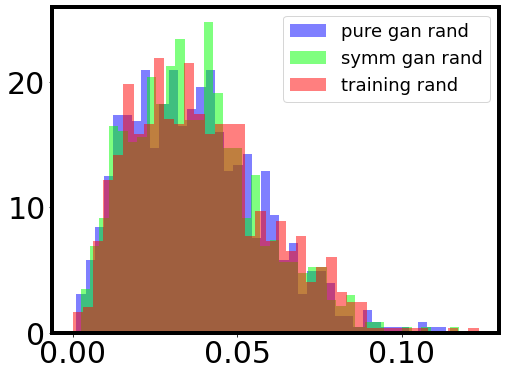

In [30]:
fig, ax8 = plt.subplots(figsize=(8,6))
plt_x_pg_s = ax8.hist(std_pg_r.reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [0,0,1,0.5], label = labels_r[0])
plt_x_sg_s = ax8.hist(std_sg_r.reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [0,1,0,0.5], label = labels_r[2])
plt_x_train_s = ax8.hist(std_trn_r[:800].reshape(800,1), bins = 40, density = True, 
                      histtype='bar', color = [1,0,0,0.5], label = labels_r[3])


ax8.legend(prop={'size': 18})
font_size = 30
ax8.tick_params(labelsize=font_size)
ax8.spines[['left','right','bottom','top']].set_linewidth(4)

In [ ]:
m_max = torch.amax(moduli)

m_max_indx = torch.argsort(moduli, dim = 0)[-10:]
print(m_max, m_max_indx)